In [3]:
import scanpy as sc
import sys
sys.path.append('/wsfish/glioblastoma/')
import FISHspace as sp
import numpy as np
import squidpy as sq
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

# make font changeable in Illustrator
mpl.rcParams['pdf.fonttype'] = 42

# save figure with no pad
mpl.rcParams['savefig.pad_inches'] = 0
mpl.rcParams['savefig.bbox'] = 'tight'

# set axes width
mpl.rcParams['axes.linewidth'] = 0.2
mpl.rcParams['xtick.minor.pad'] = 0
mpl.rcParams['xtick.major.pad'] = 0
mpl.rcParams['ytick.minor.pad'] = 0
mpl.rcParams['ytick.major.pad'] = 0
mpl.rcParams['xtick.minor.width'] = 0.2
mpl.rcParams['xtick.major.width'] = 0.2
mpl.rcParams['ytick.minor.width'] = 0.2
mpl.rcParams['ytick.major.width'] = 0.2

# use colorblind seaborn style
plt.style.use('seaborn-colorblind')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
palette = {
    'AC-like 1':'#2ecc71',
    'AC-like 2':'#2ecc71',
    'AC-like 3':'#2ecc71',
    'AC-like 4':'#2ecc71',
    'AC-like 5':'#2ecc71',
    'AC-like 6':'#2ecc71'
    'AC-like 7':'#2ecc71',
    'AC-like 8':'#2ecc71',

    'preOPC-like 1':'#7befb2',

    'GW-like 2': '#EDE8F3',
    'GW-like 3': '#E2D8EA',
    'GW-like 1': '#D6BEDD',
    'GW-like 5': '#CFA8D1',
    'GW-like 4': '#CA90C5',
    'GW-like 7': '#D873B6',
    'GW-like 8': '#C50F53',
    'GW-like 6': '#840034',
        
    'nIPC-like 1':'#FFF192',
    'nIPC-like 2':'#FFF192',
    'nIPC-like 3':'#FFF192',
    
    'RG-like':'#ff9470',
    'nIPC-RG-like':'#ff9470',
    
    'OPC-like 1':'#89c4f4',
    'OPC-like 2':'#89c4f4',

    'Endothelial 1':'#8c14fc',
    'Mural cell 1': '#8c14fc',  
    'Mural': '#8c14fc', 
    
    'Fibroblast': '#fbe7ef',
    'FB-like 2': '#FF6EC7', 
    'FB-like 3': '#FF6EC7', 

    'Mono 1': '#c8f7c5',
    'Mono 2': '#FBFCFA',

    
    'TAM-BDM 1':'#e88474',
    'TAM-BDM 2':'#A94A54',
    
    'TAM-BDM 3':'#89c4f4',
    'TAM-BDM 4':'#DC9D57',
    
    'TAM-MG':'#825e5c', 
    'DC': '#a6915c',


}

In [4]:
adata = sc.read_h5ad('../DataSubmission/GBM_Linnarsson_EEL.h5ad')

In [18]:
adata.obs['m-states'].cat.categories

Index(['AC-like 1', 'AC-like 2', 'AC-like 3', 'AC-like 4', 'AC-like 5',
       'AC-like 6', 'AC-like 7', 'DC', 'Endothelial 1', 'Erythrocyte 1',
       'FB-like 1', 'FB-like 2', 'FB-like 3', 'GBL-like 1', 'GBL-like 2',
       'GW-like 1', 'GW-like 2', 'GW-like 3', 'GW-like 4', 'GW-like 5',
       'GW-like 6', 'GW-like 7', 'GW-like 8', 'Mono 1', 'Mono 2',
       'Mural cell 1', 'Mural cell 2', 'OPC-like 1', 'OPC-like 2',
       'Oligodendrocyte 1', 'Oligodendrocyte 2', 'RG-like', 'TAM-BDM 1',
       'TAM-BDM 2', 'TAM-BDM 3', 'TAM-BDM 4', 'TAM-MG', 'nIPC-RG-like',
       'nIPC-like 1', 'nIPC-like 2', 'nIPC-like 3', 'preOPC-like 1',
       'unknown 1', 'unknown2 1'],
      dtype='object')

In [19]:
clusters = [
    'Mono 1',
    'Mono 2',
    
    'DC',
    
    'TAM-MG',
    
    'TAM-BDM 1',
    'TAM-BDM 2',
    'TAM-BDM 3',
    'TAM-BDM 4',
]


In [20]:
adata_immune = adata[adata.obs['m-states'].isin(clusters),:]

In [21]:
adata_immune.obs['m-states'].cat.categories

Index(['DC', 'Mono 1', 'Mono 2', 'TAM-BDM 1', 'TAM-BDM 2', 'TAM-BDM 3',
       'TAM-BDM 4', 'TAM-MG'],
      dtype='object')

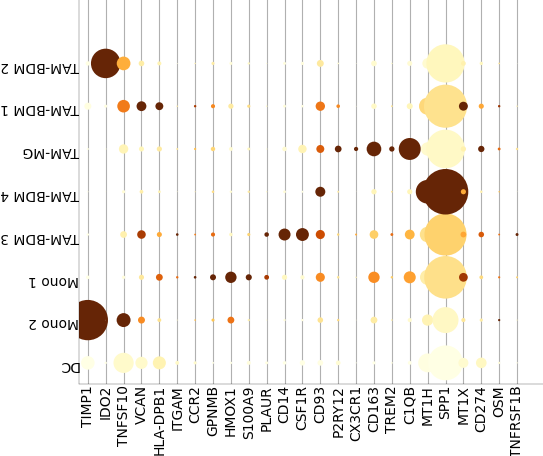

In [22]:

markers = [
    'TIMP1','IDO2','TNFSF10','VCAN',
    'HLA-DPB1','ITGAM','CCR2',
    'GPNMB', 'HMOX1','S100A9', 'PLAUR','CD14', 'CSF1R','CD93',
    'P2RY12','CX3CR1','CD163',
    'TREM2','C1QB','MT1H',
    'SPP1','MT1X',
    'CD274',
    'OSM','TNFRSF1B',
    
]
     
df =sp.pl.dotplot_bgval(
    adata_immune,
    markers,
    min_cells=0,
    max_quant=1,
    cmap='YlOrBr',
    minmax=False,
    normalize_totals=False,
    cluster_key='m-states',
    size_factor=1500,
    col_order=markers,
    row_order=['DC', 'Mono 2', 'Mono 1','TAM-BDM 3', 'TAM-BDM 4','TAM-MG','TAM-BDM 1', 'TAM-BDM 2'],
    figsize=(6,5),
    metric='jensenshannon',
    ytick_rotation=-180,
    #reverse_rows=True,
    #reverse_cols=True,
    bgval=1,
)

In [23]:
cluster_colors_GBM = {
    'Mono 1': '#c8f7c5',#'#e6d9cb',#'#cdd1e4',#'#f4ede4',
    'Mono 2': '#FBFCFA',
    
    'TAM-BDM 1':'#e88474',#'#F5C9B0',
    'TAM-BDM 2':'#A94A54',
    
    'TAM-BDM 3':'#89c4f4',#'#95a5a6',#'#ecd9dd',
    'TAM-BDM 4':'#DC9D57',#'#A5765C',
    
    'TAM-MG':'#825e5c', #'#00b5cc' (blue),
    
    'DC': '#a6915c',

}


In [95]:
adatas = []
for c in cluster_colors_GBM.keys():
    print(c)
    ad = adata_clusters[adata_clusters.obs.CombinedNameMergeImmune == c]
    ad = ad[ad.X.sum(axis=1) > 30]
    print(ad.shape)
    try:
        ad = sc.pp.subsample(ad, n_obs=10000, copy=True)
    except:
        pass
    adatas.append(ad)

mini = adatas[0].concatenate(*adatas[1:])
print('a')

sc.pp.normalize_total(mini)
sc.pp.log1p(mini)

sc.pp.pca(mini)
sc.pp.neighbors(mini)

sc.tl.umap(mini)

Mono 1
(38897, 1184)
Mono 2
(56776, 1184)
TAM-BDM 1
(57312, 1184)
TAM-BDM 2
(53822, 1184)
TAM-BDM 3
(83244, 1184)
TAM-BDM 4
(52394, 1184)
TAM-MG
(33850, 1184)
DC
(11522, 1184)
a


In [117]:
mini = adata_clusters[adata_clusters.X.sum(axis=1) > 30].copy()
sc.pp.normalize_total(mini)
sc.pp.sqrt(mini)

sc.pp.pca(mini)
sc.pp.neighbors(mini)

sc.tl.umap(mini)

IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out


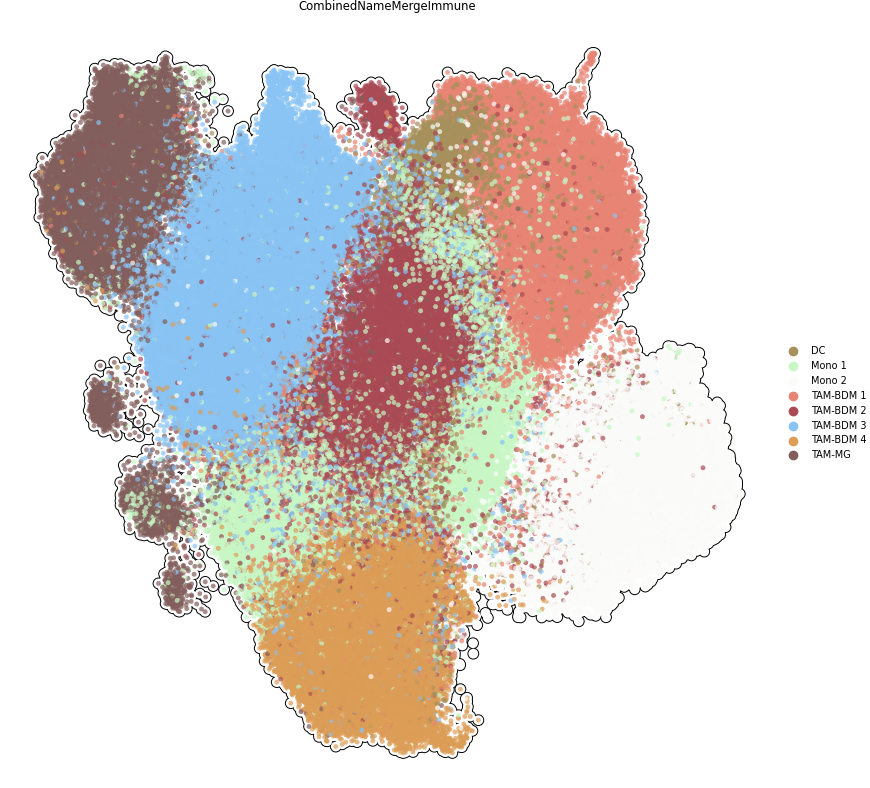

In [105]:
fig = plt.figure(figsize=[10,10]) 
ax1 = fig.subplots(1, 1, sharex=False, sharey=False)

sc.pl.umap(
    mini,
    color=[
        'm-states',
    ],
    palette=cluster_colors_GBM,
    add_outline=True, 
    outline_width=(0.2,0.5),
    frameon=False,
    ax=ax1,
    size=50,
    show=False,
)
plt.savefig('figures/UMAP_Immune.png', dpi=600, transparent=True)
plt.show()

First filter, 7805 cells left
Selecting cells in zoom area
Zoom filter, 196 cells left


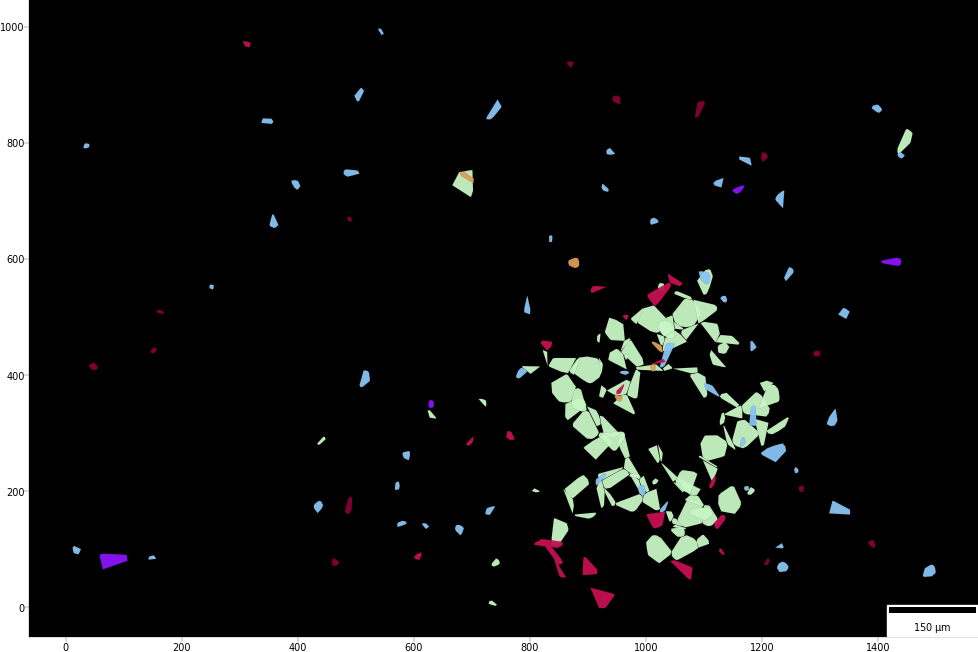

In [27]:
sp.pl.plot_polygons(
    adata,
    sample='SL001B',
    cluster_key='m-states',
    clusters = ['Mono 1', 'TAM-BDM 3', 'TAM-BDM 4','GW-like 6','GW-like 8', 'Endothelial 1', 'Mural cell 1'],
    
    xlim=(3500,5000),
    ylim=(1800,2800),
    show_axis=True,
    palette=palette,
    figsize=(10,10),
    alpha=0.95,
    facecolor=(0,0,0),
    annotate=False,
    #annotation_loc={'TAM-MDM 3':5},
    area_min_size=50,
    fontsize=12,

)

First filter, 150196 cells left
Selecting cells in zoom area
Zoom filter, 3913 cells left


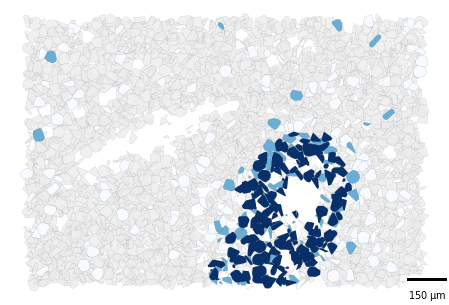

In [29]:
fig,ax = plt.subplots(1,1 ,figsize=(5,5))
xlim=(3500,5000)
ylim=(1800,2800)

sp.pl.plot_polygons_expression(
    adata,
    cluster_key='m-states',
    sample='SL001B',
    genes=['HMOX1'],
    cmap='Blues',

    xlim=xlim,
    ylim=ylim,
    alpha=1,
    show_axis=False,
    #figsize=(5,5),
    mquant=0.999,
    ax = ax

)

In [33]:
adata.obs['m-states'].cat.categories

Index(['AC-like 1', 'AC-like 2', 'AC-like 3', 'AC-like 4', 'AC-like 5',
       'AC-like 6', 'AC-like 7', 'DC', 'Endothelial 1', 'Erythrocyte 1',
       'FB-like 1', 'FB-like 2', 'FB-like 3', 'GBL-like 1', 'GBL-like 2',
       'GW-like 1', 'GW-like 2', 'GW-like 3', 'GW-like 4', 'GW-like 5',
       'GW-like 6', 'GW-like 7', 'GW-like 8', 'Mono 1', 'Mono 2',
       'Mural cell 1', 'Mural cell 2', 'OPC-like 1', 'OPC-like 2',
       'Oligodendrocyte 1', 'Oligodendrocyte 2', 'RG-like', 'TAM-BDM 1',
       'TAM-BDM 2', 'TAM-BDM 3', 'TAM-BDM 4', 'TAM-MG', 'nIPC-RG-like',
       'nIPC-like 1', 'nIPC-like 2', 'nIPC-like 3', 'preOPC-like 1',
       'unknown 1', 'unknown2 1'],
      dtype='object')

First filter, 32060 cells left
Selecting cells in zoom area
Zoom filter, 8360 cells left


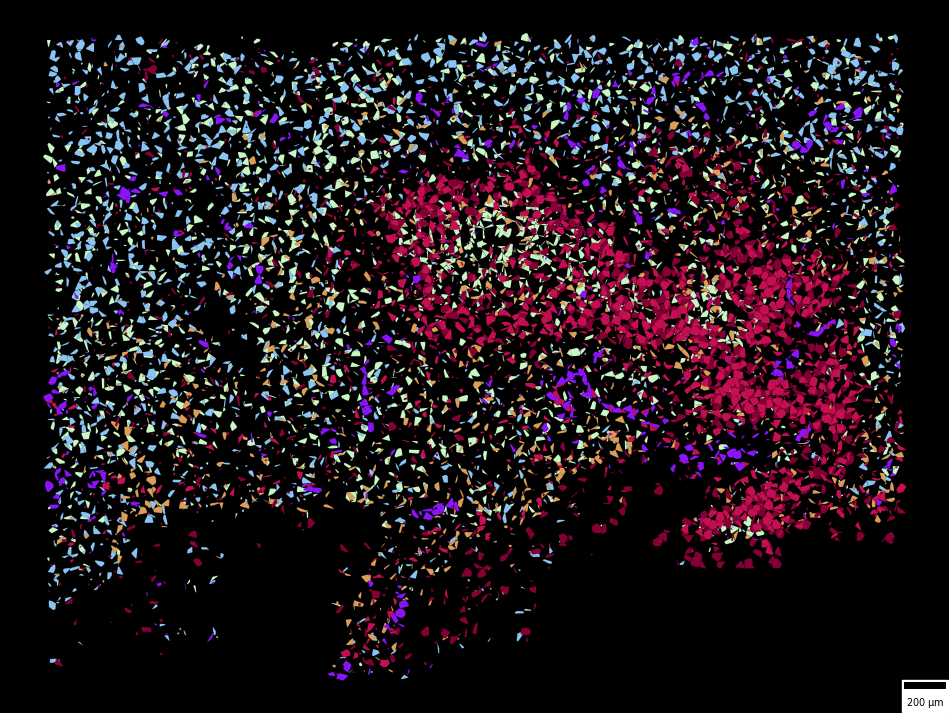

In [34]:
sp.pl.plot_polygons(
    adata,
    sample='SL046C',
    cluster_key='m-states',
    clusters = ['Mono 1','TAM-BDM 3', 'TAM-BDM 4','GW-like 6','GW-like 8', 'Endothelial 1', 'Mural cell 1'], 
    xlim=(6000,10000),
    ylim=(1000,4000),

    show_axis=False,
    palette=palette,
    figsize=(10,10),
    alpha=1,
    facecolor=(0,0,0),

    area_min_size=50,
    fontsize=12,
    annotation_rotation=-90,
    annotation_text_offset=(50,-300),
    save=True,
    savepath='figures/SL046C_Mono.svg',
    
)

First filter, 32060 cells left
Selecting cells in zoom area
Zoom filter, 8360 cells left


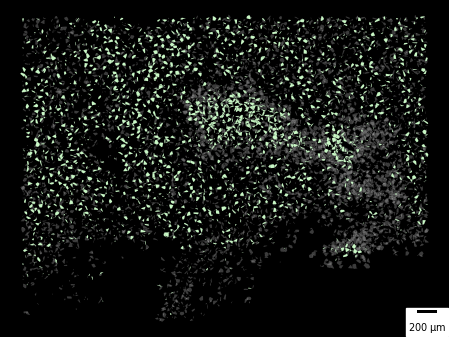

First filter, 32060 cells left
Selecting cells in zoom area
Zoom filter, 8360 cells left


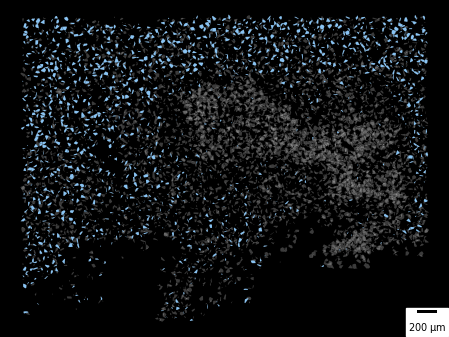

First filter, 32060 cells left
Selecting cells in zoom area
Zoom filter, 8360 cells left


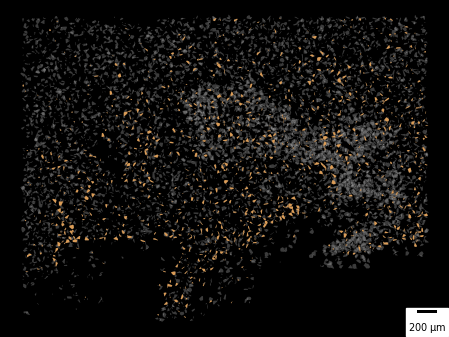

First filter, 32060 cells left
Selecting cells in zoom area
Zoom filter, 8360 cells left


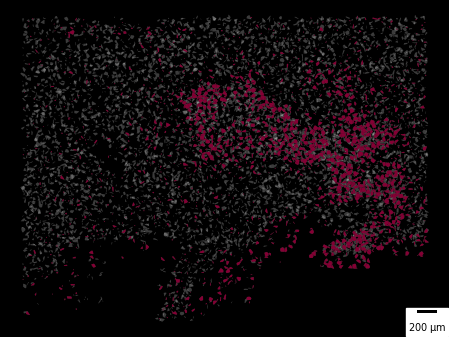

In [36]:
for c in ['Mono 1','TAM-BDM 3', 'TAM-BDM 4','GW-like 6']:
    sp.pl.plot_polygons(
        adata,
        sample='SL046C',
        cluster_key='m-states',
        clusters=[c, 'Endothelial', 'Mural'],
        grey_clusters = ['Mono 1','TAM-BDM 3', 'TAM-BDM 4','GW-like 6','GW-like 8', 'Endothelial 1', 'Mural cell 1'], 
        xlim=(6000,10000),
        ylim=(1000,4000),

        show_axis=False,
        palette=palette,
        figsize=(5,5),
        alpha=1,
        alpha_gray=0.25,
        facecolor=(0,0,0),
        area_min_size=50,
        fontsize=12,

    )

In [37]:
from FISHscale.utils.dataset import Dataset
import zarr

DS = Dataset('/wsfish/glioblastoma/EEL/Phase1/Analysis/JJEXP20220505_EEL_SL046C_S2/JJEXP20220505_EEL_SL046C_S2_RNA_transformed_assigned.parquet',
             gene_label='decoded_genes',
             pixel_size='0.27 micrometers',
             reparse=True,
            )

'''DS.color_dict['VEGFA'] = np.array((227, 61, 148)) / 255
DS.color_dict['FTL'] = np.array((255, 255, 204)) / 255
DS.color_dict['IGFBP5'] = np.array((210, 77, 87)) / 255'''


from skimage import img_as_bool
from skimage.transform import rescale
img = zarr.load('/datc/sl/fish_rawdata/JJEXP20220505_EEL_SL046C_S2/fresh_tissue/segmentation/image_segmented_labels.zarr/segmented_labels_image/')
#img = np.flip(img, axis=0)
img[img >0] = 1

img_d = rescale(img, 0.27, anti_aliasing=False)
img_d[img_d >0] = 1
img_d = img_as_bool(img_d)
import matplotlib
DS.color_dict['HMOX1'] = (0.09999999999999998, 1.0, 0.7081081081081079) # green
DS.color_dict['CD93'] = (0.8851351351351351, 0.5, 1.0) #
DS.color_dict['SPP1'] =  matplotlib.colors.to_rgb('#fbc093')
DS.color_dict['ISG15'] = matplotlib.colors.to_rgb('#89c4f4') # blue
DS.color_dict['CCL2'] = matplotlib.colors.to_rgb('#89c4f4') # blue pink
DS.color_dict['FTL'] = matplotlib.colors.to_rgb('#e88474')

DS.color_dict['VEGFA'] = matplotlib.colors.to_rgb('#e76d89')
DS.color_dict['CD14'] = matplotlib.colors.to_rgb('#eeecf3')
DS.color_dict['IFIT2'] =  matplotlib.colors.to_rgb('#ff4c30')#matplotlib.colors.to_rgb('#e33d94')
DS.color_dict['IFIT3'] =  matplotlib.colors.to_rgb('#c8f7c5')


Please install "BoneFight" or its missing dependencies. Error message: No module named 'bone_fight'
Could not import Cellpose. Ignore if cell segmentation is not needed. Error: No module named 'cellpose'


100%|██████████████████████████████████████████████████████████████████████████| 1324/1324 [00:19<00:00, 66.64it/s]


    Loaded: JJEXP20220505_EEL_SL046C_S2_RNA_transformed_assigned


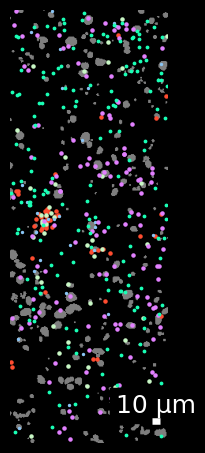

In [39]:
#v =  [[7800,2500],[8100,3300]]
v = [[7900,2800],[8100,3350]]
scale_factor = 1#0.27*4.5
img_zoom = img_d[int(v[0][1]*scale_factor):int(v[1][1]*scale_factor),int(v[0][0]*scale_factor):int(v[1][0]*scale_factor)]

sizes = [5, 5,2,5,3] 
genes = ['IFIT2','IFIT3','ISG15','CD93','HMOX1']
DS.scatter_plot(
    genes,
    s=sizes,
    ax_scale_factor=200,
    show_axes=False,
    show_legend=False,
    view = v,
    image=img_zoom,
    invert_yaxis=False,
    reset_xy=True,

)

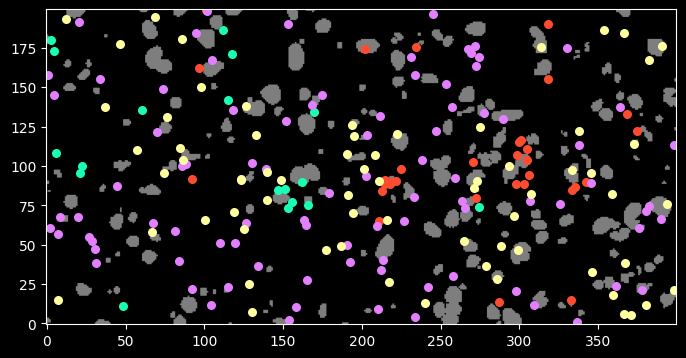

In [40]:
v = [[8100,3000],[8500,3200]]
scale_factor = 1#0.27*4.5
img_zoom = img_d[int(v[0][1]*scale_factor):int(v[1][1]*scale_factor),int(v[0][0]*scale_factor):int(v[1][0]*scale_factor)]

DS.color_dict['IL1B'] = (0.09999999999999998, 1.0, 0.7081081081081079)
DS.color_dict['VCAN'] = matplotlib.colors.to_rgb('#ffff9f') 
DS.color_dict['S100A9'] = matplotlib.colors.to_rgb('#89c4f4') 

sizes = [30, 30,30,30,30] 
genes = ['IFIT2','IL1B','CD93','VCAN']
DS.scatter_plot(
    genes,
    s=sizes,
    ax_scale_factor=400,
    show_axes=True,
    show_legend=False,
    view = v,
    image=img_zoom,
    scalebar=False,
    invert_yaxis=True,
    reset_xy=True,

)

# SL061B

First filter, 54223 cells left
Selecting cells in zoom area
Zoom filter, 3506 cells left


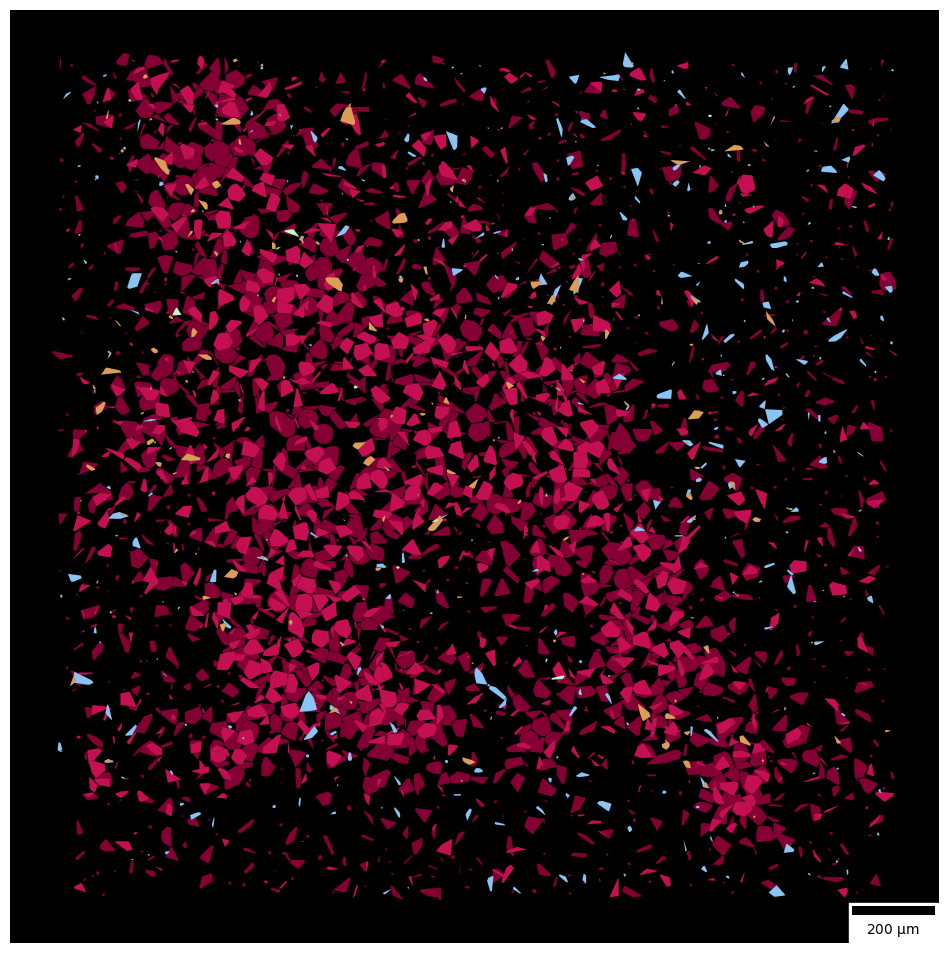

In [41]:
xlim = (4000,6000)
ylim = (4000,6000)
sp.pl.plot_polygons(
    adata,
    sample='SL061B',
    cluster_key='m-states',
    clusters = ['GW-like 6','GW-like 8','TAM-BDM 3', 'TAM-BDM 4', 'Endothelial', 'Mural', 'Mono 1', ],
    xlim = xlim,
    ylim = ylim,
    show_axis=False,
    palette=palette,
    figsize=(10,10),
    alpha=1,
    facecolor=(0,0,0),
    area_min_size=5,
    fontsize=18,

    
)

In [42]:
from FISHscale.utils.dataset import Dataset
DS = Dataset('/wsfish/glioblastoma/EEL/Phase1/Analysis/JJEXP20220725_EEL_SL061B_S1/JJEXP20220725_EEL_SL061B_S1_RNA_transformed_assigned.parquet',
             gene_label='decoded_genes',
             pixel_size='0.27 micrometers',
             reparse=True,
            )

import zarr
from skimage import img_as_bool
from skimage.transform import rescale
img = zarr.load('/date/sl/fish_rawdata/JJEXP20220725_EEL_SL061B_S1/fresh_tissue/segmentation/image_segmented_labels.zarr/segmented_labels_image/')
img[img >0] = 1

img_d = rescale(img, 0.27, anti_aliasing=False)
img_d[img_d >0] = 1
img_d = img_as_bool(img_d)
import matplotlib
DS.color_dict['HMOX1'] = (0.09999999999999998, 1.0, 0.7081081081081079) # green
DS.color_dict['CD93'] = (0.8851351351351351, 0.5, 1.0) #
DS.color_dict['SPP1'] =  matplotlib.colors.to_rgb('#fbc093')
DS.color_dict['ISG15'] = matplotlib.colors.to_rgb('#89c4f4') # blue
DS.color_dict['CCL2'] = matplotlib.colors.to_rgb('#89c4f4') # blue pink
DS.color_dict['FTL'] = matplotlib.colors.to_rgb('#e88474')

DS.color_dict['VEGFA'] = matplotlib.colors.to_rgb('#e76d89')
DS.color_dict['CD14'] = matplotlib.colors.to_rgb('#eeecf3')
DS.color_dict['CD74'] = matplotlib.colors.to_rgb('#89c4f4')
DS.color_dict['TREM2'] = (0.09999999999999998, 1.0, 0.7081081081081079) # green
DS.color_dict['CD163'] =  matplotlib.colors.to_rgb('#ffff9f') 
DS.color_dict['MT1H'] = matplotlib.colors.to_rgb('#9f5afd') 

100%|██████████████████████████████████████████████████████████████████████████| 1324/1324 [00:26<00:00, 49.34it/s]


    Loaded: JJEXP20220725_EEL_SL061B_S1_RNA_transformed_assigned


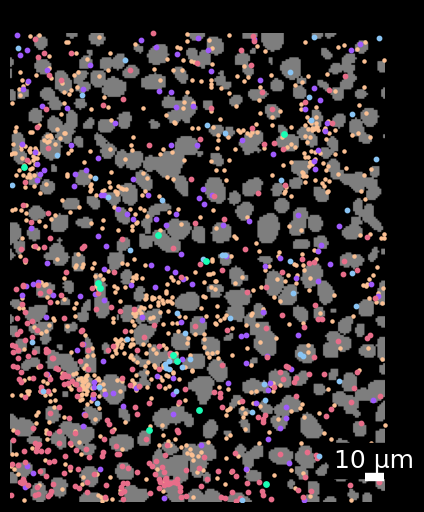

In [44]:
xlim = (5150,5350)
ylim = (5150,5400)
scale_factor = 1
v = [[xlim[0],ylim[0]], [xlim[1],ylim[1]]]
img_zoom = img_d[int(v[0][1]*scale_factor):int(v[1][1]*scale_factor),int(v[0][0]*scale_factor):int(v[1][0]*scale_factor)]

sizes = [5,10,10,10, 15,15] 
genes = ['SPP1', 'MT1H','VEGFA','CD74', 'TREM2']
DS.scatter_plot(
    genes,
    s=sizes,
    ax_scale_factor=500,
    show_axes=False,
    show_legend=False,
    view = v,
    image=img_zoom,
    invert_yaxis=True,
    reset_xy=True,
    scalebar=True,

)